<a href="https://colab.research.google.com/github/MohamedIsmailMihal/proton-auto-ml-fs-intern-test/blob/main/WebApp_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following notebook will take in a sample dataset, perform exploratory data analysis, and build a machine learning model for you. All you are expected to do is to run this Interactive Jupyter Notebook once. Your task is to build a web based application using web frameworks that are commonly used to deploy machine learning models to the web. Using MERN stack for creating and maintaining the webapp will positively affect the evaluation process of your application although it is not mandatory for you to be considered. You are expected to created a webapp that will display the various plots generated during the EDA and also add functionality for a UI that will allow users to enter the information directly onto the webapp so that the developed machine learning model can be used to make predictions on unseen data.
You have complete creative license to develop the application as you please because we are interested more about how you choose to approach the various challenges one may face during developing such an application. 

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("titanic.csv")

In [40]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [42]:
df.dropna(subset=['Embarked'],inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
print(df.describe())
print(df.shape)

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   889.000000  889.000000  889.000000  ...  889.000000  889.000000  889.000000
mean    446.000000    0.382452    2.311586  ...    0.524184    0.382452   32.096681
std     256.998173    0.486260    0.834700  ...    1.103705    0.806761   49.697504
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     224.000000    0.000000    2.000000  ...    0.000000    0.000000    7.895800
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.000000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
(889, 12)


In [44]:
print("The number of columns present is as follows",df.columns.value_counts().sum())
print("The columns present in the actual dataset is as follows", df.columns.tolist())
cols = df.columns.tolist()

The number of columns present is as follows 12
The columns present in the actual dataset is as follows ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [45]:
print("Visualising the dtypes",df.dtypes)
num_cols = df.select_dtypes([np.int64,np.float64]).columns.tolist()
num_cols.remove('PassengerId')
print(num_cols)

Visualising the dtypes PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


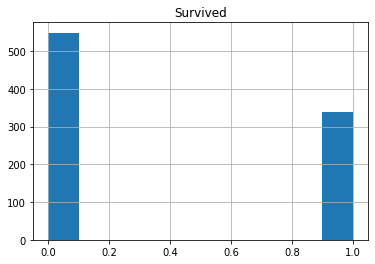

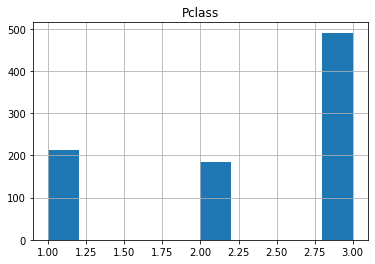

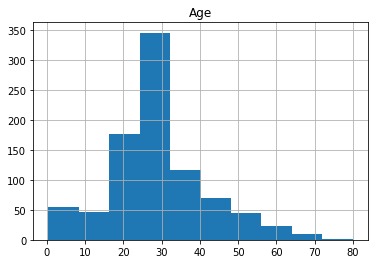

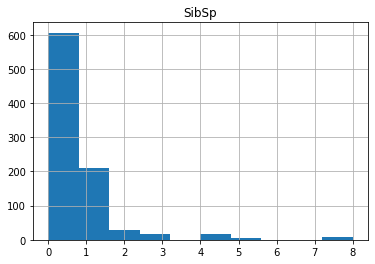

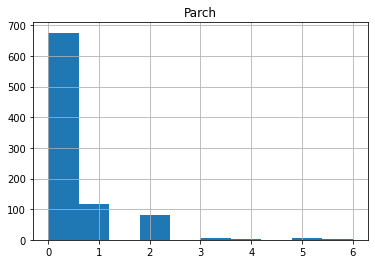

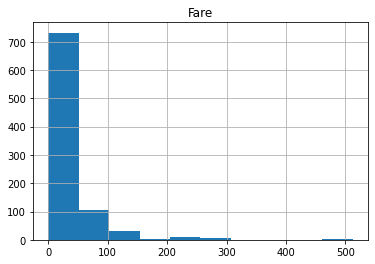

In [46]:
#Generating Histograms for numeric columns
for col in num_cols:
    df.hist(column=col)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f293f067890>,
      dtype=object)

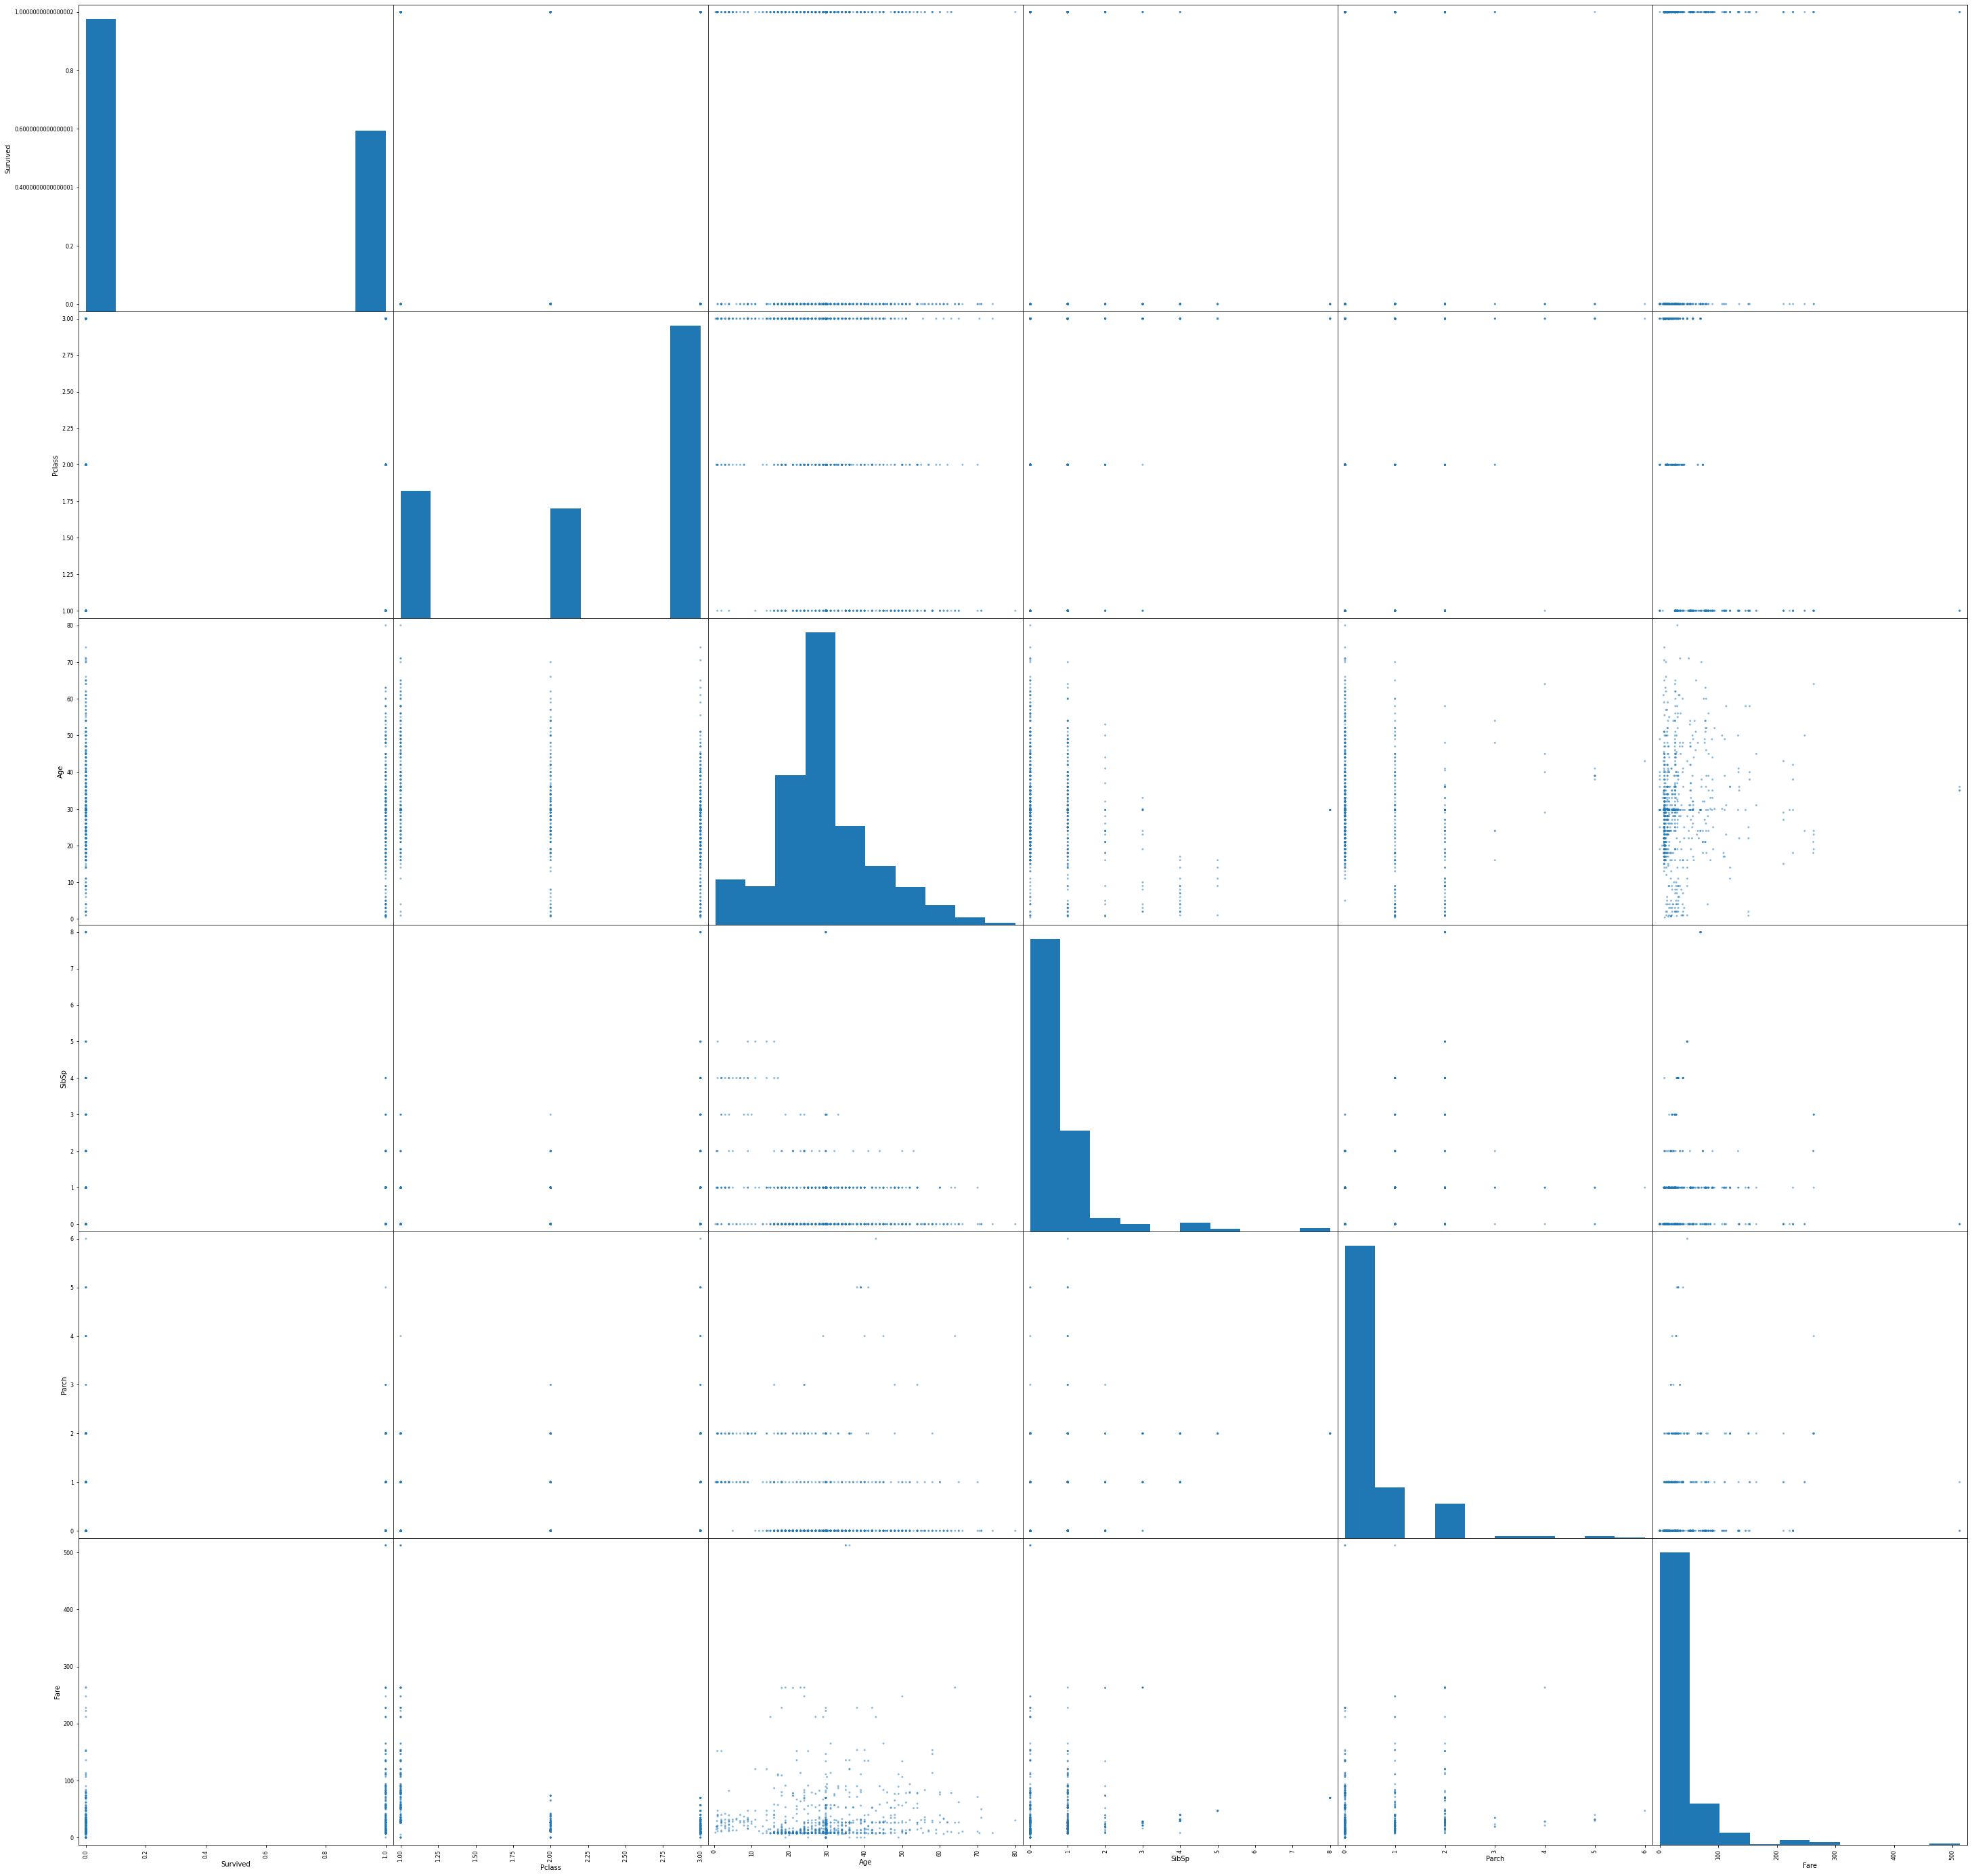

In [47]:
#Studying the correlation of the columns using scatter plots
from pandas.plotting import scatter_matrix

scatter_matrix(df[num_cols],figsize=(50,50))

In [48]:
obj_cols = df.select_dtypes([np.object]).columns.tolist()
# obj_cols.remove('Name')
# obj_cols.remove('Cabin')
# obj_cols.remove('Ticket')
# print(obj_cols)

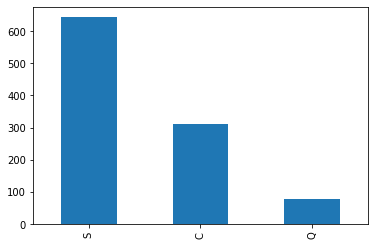

In [49]:
#Plotting categorical data against frequency
for col in obj_cols:
    df[col].value_counts().plot(kind='bar')

In [50]:
y = pd.Series(df['Survived'])
drop_list = ['Survived','Name','Ticket','Cabin']
X = df.drop(drop_list,axis=1)

In [51]:
!pip install category_encoders

In [52]:
import category_encoders as ce
encoder=ce.OneHotEncoder(handle_unknown='return_nan',return_df=True,use_cat_names=True)
X = encoder.fit_transform(X)
X

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,PassengerId,Pclass,Sex_male,Sex_female,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,1,3,1.0,0.0,22.000000,1,0,7.2500,1.0,0.0,0.0
1,2,1,0.0,1.0,38.000000,1,0,71.2833,0.0,1.0,0.0
2,3,3,0.0,1.0,26.000000,0,0,7.9250,1.0,0.0,0.0
3,4,1,0.0,1.0,35.000000,1,0,53.1000,1.0,0.0,0.0
4,5,3,1.0,0.0,35.000000,0,0,8.0500,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1.0,0.0,27.000000,0,0,13.0000,1.0,0.0,0.0
887,888,1,0.0,1.0,19.000000,0,0,30.0000,1.0,0.0,0.0
888,889,3,0.0,1.0,29.699118,1,2,23.4500,1.0,0.0,0.0
889,890,1,1.0,0.0,26.000000,0,0,30.0000,0.0,1.0,0.0


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [62]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

train_preds = model.predict(X_train)
print("Training scores are as follows")
print("Accuracy Score",accuracy_score(train_preds,y_train))
print("F1 Score",f1_score(train_preds,y_train))
print("ROC AUC Score",roc_auc_score(train_preds,y_train))


test_preds = model.predict(X_test)
print("Testing scores are as follows")
print("Accuracy Score",accuracy_score(test_preds,y_test))
print("F1 Score",f1_score(test_preds,y_test))
print("ROC AUC Score",roc_auc_score(test_preds,y_test))

Training scores are as follows
Accuracy Score 1.0
F1 Score 1.0
ROC AUC Score 1.0
Testing scores are as follows
Accuracy Score 0.8089887640449438
F1 Score 0.7343749999999999
ROC AUC Score 0.802683615819209


In [57]:
import joblib

In [58]:
joblib.dump(model,"model_joblib")

['model_joblib']

In [63]:
#Testing
loaded_model = joblib.load("model_joblib")
array = [5,3,1.0,0.0,35.0,0,0,8.0500,1.0,0.0,0.0] 
#each value represents a feature present in the training set Hint: the users should be able to enter their own values/(or) select from a drop down list of values to make custom predictions
a = np.asarray(array).reshape(1,-1)
predicted_value= loaded_model.predict(a)

In [66]:
actual_value = y[4]
print("Actual Value",actual_value)
print("Predicted Value",predicted_value)

Actual Value 0
Predicted Value [0]
